In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

%matplotlib inline

In [2]:
data = pd.read_csv('Breast_cancer_data.csv')
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [3]:
data.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

In [4]:
data.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

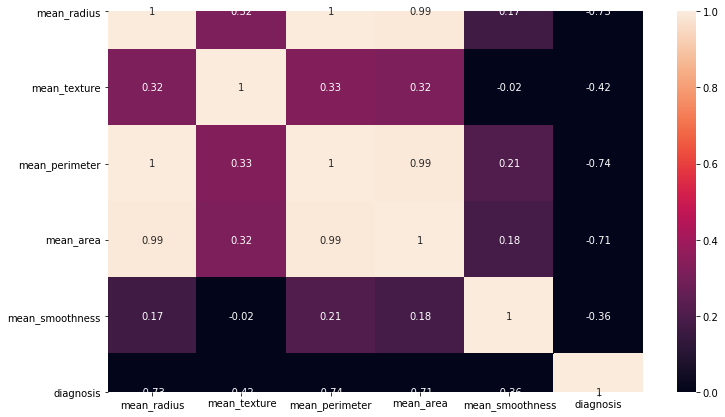

In [5]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,7))

correlation_matrics = data.corr().round(2)

sns.heatmap(data=correlation_matrics,vmin=0,vmax=1,annot=True,ax=ax)

# LOGISTIC REGRASSION

In [6]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [23]:
 data1 = data.drop(columns=['mean_radius','mean_perimeter'])


In [27]:
from sklearn.preprocessing import StandardScaler
import numpy as np


scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1)

In [24]:
x = data1.iloc[:,:-1]
x

,mean_texture,mean_area,mean_smoothness
0,10.38,1001.0,0.11840
1,17.77,1326.0,0.08474
2,21.25,1203.0,0.10960
3,20.38,386.1,0.14250
4,14.34,1297.0,0.10030
...,...,...,...
564,22.39,1479.0,0.11100
565,28.25,1261.0,0.09780
566,28.08,858.1,0.08455
567,29.33,1265.0,0.11780


In [25]:
y = data1.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [35]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
classifier = LogisticRegression()
classifier = classifier.fit(X_train,y_train)

C:\Users\PUKHRAJ\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1], dtype=int64)

In [39]:
print(metrics.confusion_matrix(y_test,y_pred))

[[41  6]
 [ 1 66]]


In [40]:
print(metrics.accuracy_score(y_test,y_pred))

0.9385964912280702


In [41]:
print("Classification Report:");print(metrics.classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92        47
           1       0.92      0.99      0.95        67

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



# DECISION TREE

In [42]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [43]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [44]:
from sklearn import tree

In [45]:
clf = tree.DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=4,)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [46]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1], dtype=int64)

In [47]:
print("Confusion_matrics:");print(metrics.confusion_matrix(y_test,y_pred))

Confusion_matrics:
[[25 22]
 [ 1 66]]


In [48]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7982456140350878


In [49]:
print("Classification Report:");print(metrics.classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.53      0.68        47
           1       0.75      0.99      0.85        67

    accuracy                           0.80       114
   macro avg       0.86      0.76      0.77       114
weighted avg       0.84      0.80      0.78       114



# RANDOM FOREST

In [55]:
data1.head()

,mean_texture,mean_area,mean_smoothness,diagnosis
0,10.38,1001.0,0.11840,0
1,17.77,1326.0,0.08474,0
2,21.25,1203.0,0.10960,0
3,20.38,386.1,0.14250,0
4,14.34,1297.0,0.10030,0


In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 7)

In [57]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model = model.fit(x_train,y_train)

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

y_pred = model.predict(x_test)

cm = confusion_matrix(y_test,y_pred)

In [59]:
print(cm)

[[ 46   9]
 [  5 111]]


In [60]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9181286549707602


In [61]:
print("Classification Report:");print(metrics.classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        55
           1       0.93      0.96      0.94       116

    accuracy                           0.92       171
   macro avg       0.91      0.90      0.90       171
weighted avg       0.92      0.92      0.92       171



# BAGGING

In [63]:
data1.head()

,mean_texture,mean_area,mean_smoothness,diagnosis
0,10.38,1001.0,0.11840,0
1,17.77,1326.0,0.08474,0
2,21.25,1203.0,0.10960,0
3,20.38,386.1,0.14250,0
4,14.34,1297.0,0.10030,0


In [64]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 7)

dt_bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=10),n_estimators=100,bootstrap=True,oob_score=True,random_state=25)
dt_bag_clf.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=10,
                                                        splitter='best'),
      

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix

y_pred = dt_bag_clf.predict(x_test)

print('Bagging Classifier score:' ,accuracy_score(y_test,y_pred))
print('Confusion Matrix:' ,confusion_matrix(y_test,y_pred))

Bagging Classifier score: 0.9239766081871345
Confusion Matrix: [[ 47   8]
 [  5 111]]


# BAGGING WITHOUT REPLACE

In [66]:

dt_bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=10),n_estimators=100,bootstrap=False,random_state=25)
dt_bag_clf.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=10,
                                                        splitter='best'),
      

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix

y_pred = dt_bag_clf.predict(x_test)

print('Bagging Classifier score:' ,accuracy_score(y_test,y_pred))
print('Confusion Matrix:' ,confusion_matrix(y_test,y_pred))

Bagging Classifier score: 0.8830409356725146
Confusion Matrix: [[ 47   8]
 [ 12 104]]
